In [104]:
from bs4 import BeautifulSoup
import requests
import cv2
import matplotlib.pyplot as plt
import numpy as np

## web scraping and saving the image

1. Scrape an RGB image from a target webpage

In [105]:
page_url = "https://www.scrapethissite.com/pages/frames/?frame=i"

In [106]:
response = requests.get(page_url)
soup = BeautifulSoup(response.content, 'html.parser')

In [107]:
image_url = soup.find_all("img")[1].attrs['src']
image_url

'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Carettochelys_insculpta.jpg/200px-Carettochelys_insculpta.jpg'

In [108]:
image_filename = soup.find_all("img")[1].h3.text
image_filename

'Carettochelyidae'

In [109]:
img = requests.get(image_url)
with open(image_filename+'.jpg', 'wb') as f:
    f.write(img.content)

## image processing

2. Apply Advanced Histogram Analysis

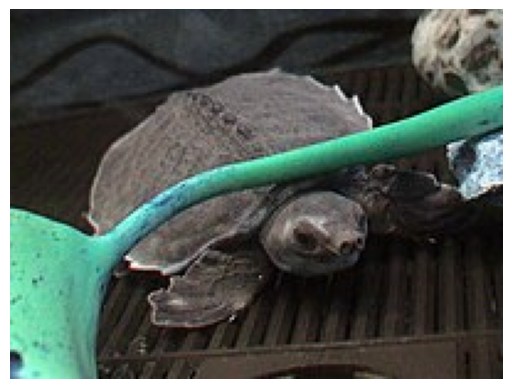

In [110]:
image = cv2.imread("Carettochelyidae.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [111]:
r,g,b=cv2.split(image)

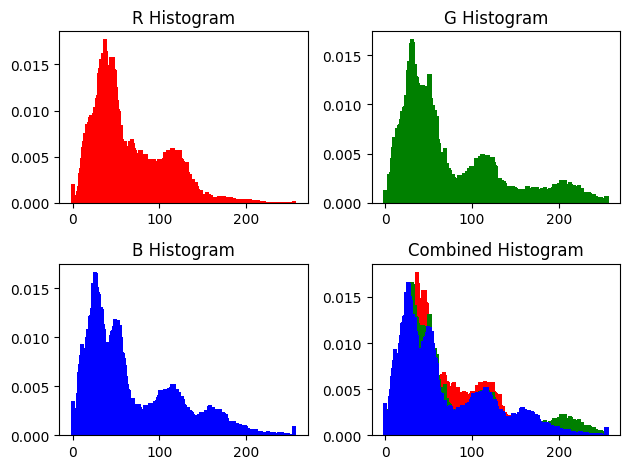

In [112]:
hist_r = cv2.calcHist([r], [0], None,[256], [0,256])
hist_g = cv2.calcHist([g], [0], None,[256], [0,256])
hist_b = cv2.calcHist([b], [0], None,[256], [0,256])

# normalize
total_pixels = r.size 
hist_r /= total_pixels
hist_g /= total_pixels
hist_b /= total_pixels

plt.Figure(figsize=(10,10))
plt.subplot(2, 2, 1)
intensity_values_pixels = np.array([c for c in range(hist_r.shape[0])])
plt.bar(intensity_values_pixels, hist_r[:,0], width=5, color='red')
plt.title('R Histogram')

plt.subplot(2, 2, 2)
intensity_values_pixels = np.array([c for c in range(hist_g.shape[0])])
plt.bar(intensity_values_pixels, hist_g[:,0], width=5, color='green')
plt.title('G Histogram')

plt.subplot(2, 2, 3)
intensity_values_pixels = np.array([c for c in range(hist_b.shape[0])])
plt.bar(intensity_values_pixels, hist_b[:,0], width=5, color='blue')
plt.title('B Histogram')

plt.subplot(2, 2, 4)
plt.bar(intensity_values_pixels, hist_r[:,0], width=5, color='red')
plt.bar(intensity_values_pixels, hist_g[:,0], width=5, color='green')
plt.bar(intensity_values_pixels, hist_b[:,0], width=5, color='blue')
plt.title('Combined Histogram')

plt.tight_layout()
plt.show()

3. Perform Multiple Intensity Transformations

In [113]:
log_image = np.log1p(image)
log_image = np.uint8(255 * log_image / np.max(log_image))

gamma_corrected_1 = np.power(image / 255.0, 0.5) * 255
gamma_corrected_2 = np.power(image / 255.0, 2.0) * 255

min_val, max_val = np.min(image), np.max(image)
contrast_stretched = ((image - min_val) / (max_val - min_val)) * 255

4. Apply Histogram Equalization

In [114]:
equalized_r = cv2.equalizeHist(r)
equalized_g = cv2.equalizeHist(g)
equalized_b = cv2.equalizeHist(b)

equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
y_channel, cr_channel, cb_channel = cv2.split(ycrcb)
equalized_y = cv2.equalizeHist(y_channel)
equalized_ycrcb = cv2.merge((equalized_y, cr_channel, cb_channel))
equalized_color_image = cv2.cvtColor(equalized_ycrcb, cv2.COLOR_YCrCb2BGR)

5. Thresholding and Segmentation

In [115]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

6. Visualization Layout

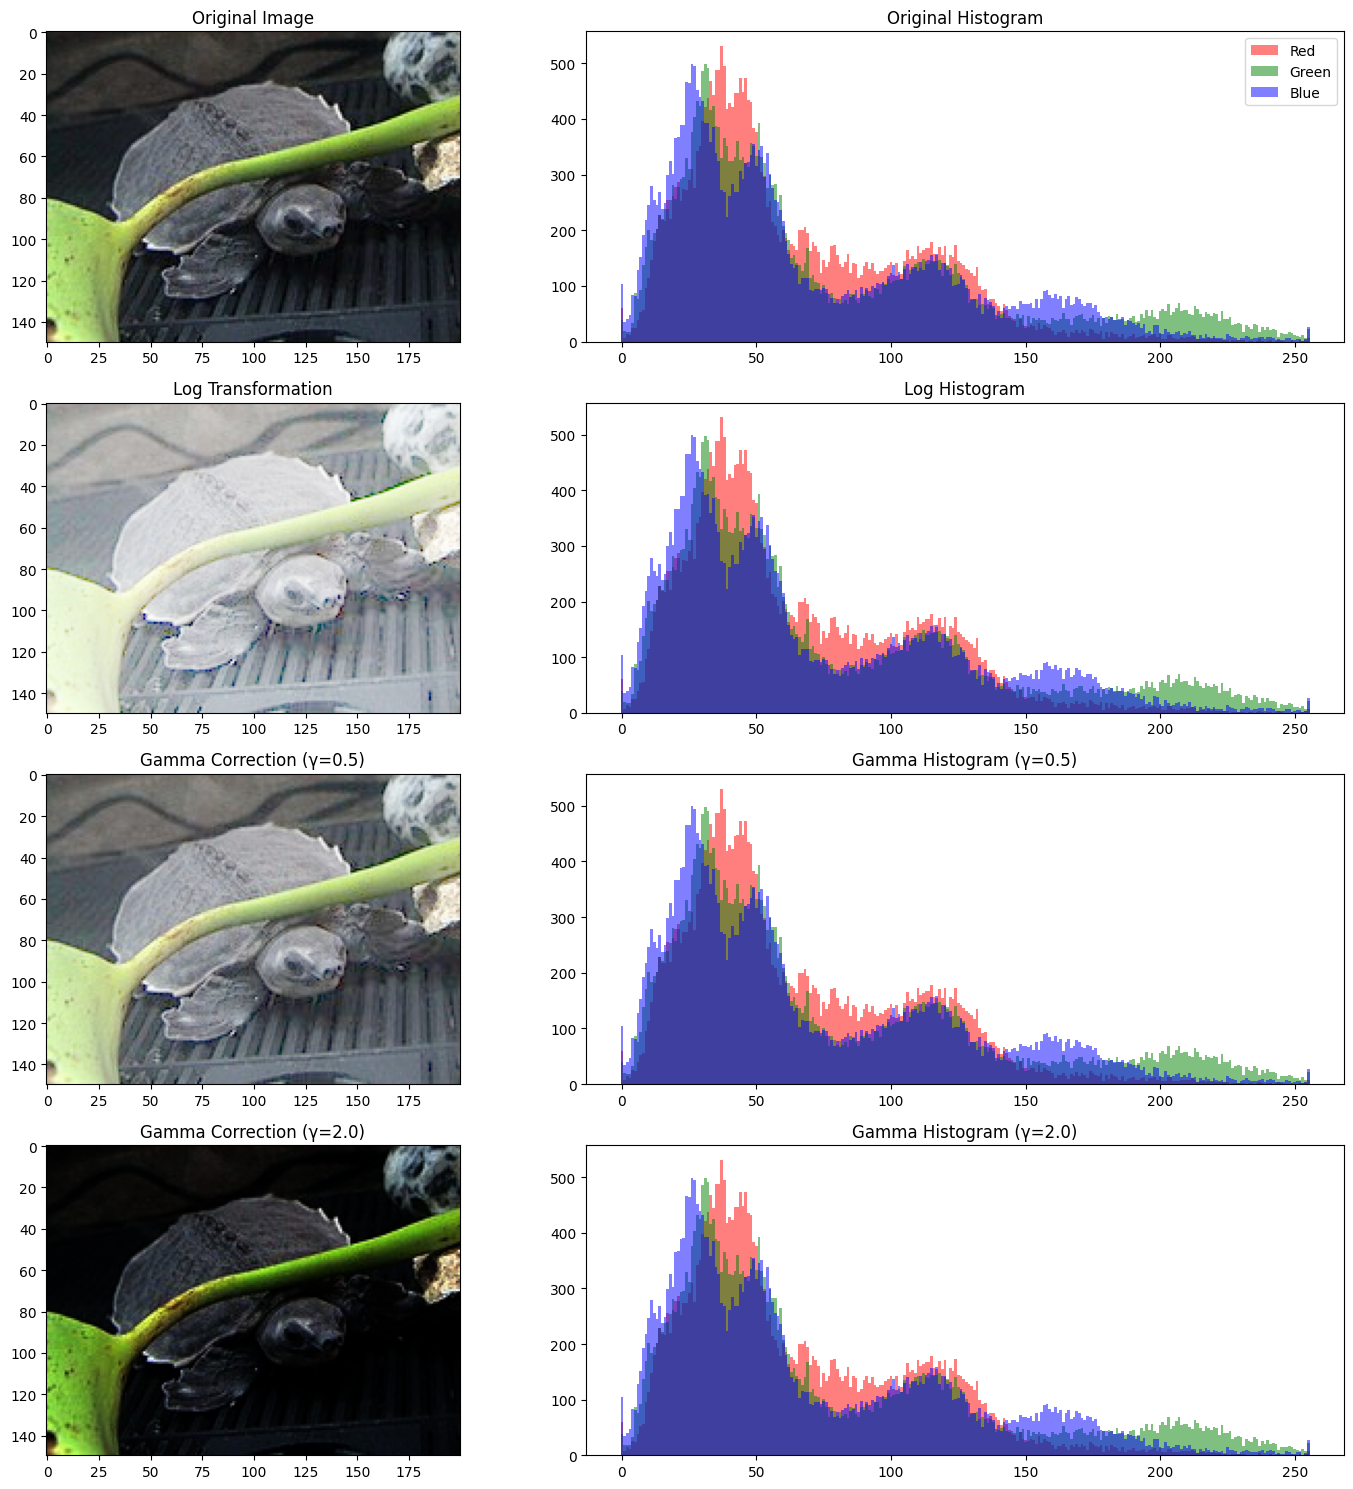

In [117]:
r,g,b = cv2.split(image)

def calculate_histograms(image):
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    return hist_r, hist_g, hist_b

hist_r, hist_g, hist_b = calculate_histograms(image)

log_image = np.log1p(image)  
log_image = np.uint8(255 * log_image / np.max(log_image))

gamma_corrected_1 = np.power(image / 255.0, 0.5) * 255
gamma_corrected_2 = np.power(image / 255.0, 2.0) * 255

min_val, max_val = np.min(image), np.max(image)
contrast_stretched = ((image - min_val) / (max_val - min_val)) * 255

hist_log = calculate_histograms(log_image)
hist_gamma_1 = calculate_histograms(gamma_corrected_1)
hist_gamma_2 = calculate_histograms(gamma_corrected_2)
hist_contrast = calculate_histograms(contrast_stretched)

# plot
plt.figure(figsize=(15, 15))

# Original Image and Histograms
plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(4, 2, 2)
plt.bar(np.arange(256), hist_r[:, 0], width=1, color='red', alpha=0.5, label='Red')
plt.bar(np.arange(256), hist_g[:, 0], width=1, color='green', alpha=0.5, label='Green')
plt.bar(np.arange(256), hist_b[:, 0], width=1, color='blue', alpha=0.5, label='Blue')
plt.title('Original Histogram')
plt.legend()

# Log Transformation
plt.subplot(4, 2, 3)
plt.imshow(cv2.cvtColor(log_image, cv2.COLOR_BGR2RGB))
plt.title('Log Transformation')

plt.subplot(4, 2, 4)
plt.bar(np.arange(256), hist_log[0][:, 0], width=1, color='red', alpha=0.5)
plt.bar(np.arange(256), hist_log[1][:, 0], width=1, color='green', alpha=0.5)
plt.bar(np.arange(256), hist_log[2][:, 0], width=1, color='blue', alpha=0.5)
plt.title('Log Histogram')

# Gamma Correction 1
plt.subplot(4, 2, 5)
plt.imshow(cv2.cvtColor(gamma_corrected_1.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Gamma Correction (γ=0.5)')

plt.subplot(4, 2, 6)
plt.bar(np.arange(256), hist_gamma_1[0][:, 0], width=1, color='red', alpha=0.5)
plt.bar(np.arange(256), hist_gamma_1[1][:, 0], width=1, color='green', alpha=0.5)
plt.bar(np.arange(256), hist_gamma_1[2][:, 0], width=1, color='blue', alpha=0.5)
plt.title('Gamma Histogram (γ=0.5)')

# Gamma Correction 2
plt.subplot(4, 2, 7)
plt.imshow(cv2.cvtColor(gamma_corrected_2.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Gamma Correction (γ=2.0)')

plt.subplot(4, 2, 8)
plt.bar(np.arange(256), hist_gamma_2[0][:, 0], width=1, color='red', alpha=0.5)
plt.bar(np.arange(256), hist_gamma_2[1][:, 0], width=1, color='green', alpha=0.5)
plt.bar(np.arange(256), hist_gamma_2[2][:, 0], width=1, color='blue', alpha=0.5)
plt.title('Gamma Histogram (γ=2.0)')

plt.tight_layout()
plt.show()